<a href="https://colab.research.google.com/github/KemiAhmed/Stroke-Predictor/blob/main/Model_performance_before_balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [24]:
install.packages("class")  # Install the package if not already installed
            # Load the package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
install.packages("VIM")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘zoo’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘DEoptimR’, ‘lmtest’, ‘RcppEigen’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘laeken’, ‘ranger’


Loading required package: colorspace


Attaching package: ‘colorspace’


The following object is masked from ‘package:pROC’:

    coords


Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep




In [30]:
library(VIM)

In [25]:
library(class)

In [3]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("randomForest")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
# Load the libraries
library(tidyverse)
library(caret)
library(randomForest)
library(pROC)
library(ggplot2)

In [7]:
# Load data
stroke_data <- read.csv("stroke_dataset.csv")

In [8]:
# Display the first few rows of the dataset
head(stroke_data)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>
1,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
3,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
6,56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


In [9]:
# Check for missing values
colSums(is.na(stroke_data))

# Handle missing values (e.g., impute or remove)
# For simplicity, let's remove rows with missing values
stroke_data <- stroke_data %>% drop_na()

# Convert categorical variables to factors
stroke_data <- stroke_data %>%
  mutate(
    gender = as.factor(gender),
    hypertension = as.factor(hypertension),
    heart_disease = as.factor(heart_disease),
    ever_married = as.factor(ever_married),
    work_type = as.factor(work_type),
    Residence_type = as.factor(Residence_type),
    smoking_status = as.factor(smoking_status),
    stroke = as.factor(stroke)
  )

# Check the structure of the dataset
str(stroke_data)

id            gender               age      hypertension 
                0                 0                 0                 0 
    heart_disease      ever_married         work_type    Residence_type 
                0                 0                 0                 0 
avg_glucose_level               bmi    smoking_status            stroke 
                0                 0                 0                 0

'data.frame':	5110 obs. of  12 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : Factor w/ 3 levels "Female","Male",..: 2 1 2 1 1 2 2 1 1 1 ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 2 1 1 1 ...
 $ heart_disease    : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 2 1 1 1 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 1 2 2 ...
 $ work_type        : Factor w/ 5 levels "children","Govt_job",..: 4 5 4 4 5 4 4 4 4 4 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 2 1 1 2 1 2 1 2 1 2 ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : chr  "36.6" "N/A" "32.5" "34.4" ...
 $ smoking_status   : Factor w/ 4 levels "formerly smoked",..: 1 2 2 3 2 1 2 2 4 4 ...
 $ stroke           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...


       id           gender          age        hypertension heart_disease
 Min.   :   67   Female:2994   Min.   : 0.08   0:4612       0:4834       
 1st Qu.:17741   Male  :2115   1st Qu.:25.00   1: 498       1: 276       
 Median :36932   Other :   1   Median :45.00                             
 Mean   :36518                 Mean   :43.23                             
 3rd Qu.:54682                 3rd Qu.:61.00                             
 Max.   :72940                 Max.   :82.00                             
                                                                         
 ever_married         work_type    Residence_type avg_glucose_level
 No :1757     children     : 687   Rural:2514     Min.   : 55.12   
 Yes:3353     Govt_job     : 657   Urban:2596     1st Qu.: 77.25   
              Never_worked :  22                  Median : 91.89   
              Private      :2925                  Mean   :106.15   
              Self-employed: 819                  3rd Qu.:114.09   


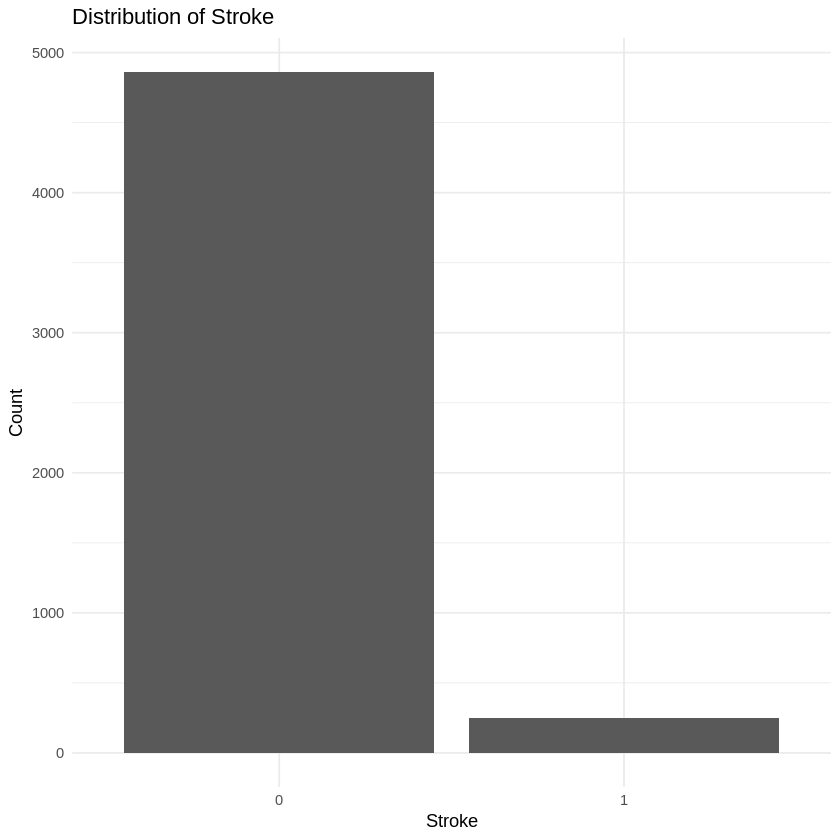

In [26]:
# Summary statistics
summary(stroke_data)

# Distribution of the target variable (stroke)
ggplot(stroke_data, aes(x = stroke)) +
  geom_bar() +
  theme_minimal() +
  labs(title = "Distribution of Stroke", x = "Stroke", y = "Count")



In [27]:
# Correlation matrix for numerical variables
numeric_data <- stroke_data %>% select(age, avg_glucose_level)
cor_matrix <- cor(numeric_data, use = "complete.obs")
print(cor_matrix)

                        age avg_glucose_level
age               1.0000000         0.2381711
avg_glucose_level 0.2381711         1.0000000


In [16]:
install.packages("naniar")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’




In [19]:
library(naniar)

In [20]:
miss_scan_count(stroke_data, search = list( "N/A"))


Variable,n
<chr>,<int>
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0


In [21]:
# Replace "N/A" and other placeholders with NA
stroke_data$bmi[stroke_data$bmi == "N/A"] <- NA

In [22]:
# Convert 'bmi' from character to numeric (may introduce NAs for invalid entries)
stroke_data$bmi <- as.numeric(stroke_data$bmi)

# Check if conversion has worked correctly
summary(stroke_data$bmi)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  10.30   23.50   28.10   28.89   33.10   97.60     201 

In [31]:
# Impute missing BMI using kNN
stroke_data <- kNN(stroke_data, variable = "bmi", k = 5, imp_var = FALSE)

In [32]:
sum(is.na(stroke_data$bmi))

[1] 0

In [33]:
# Correlation matrix for numerical variables
numeric_data <- stroke_data %>% select(age, avg_glucose_level, bmi)
cor_matrix <- cor(numeric_data, use = "complete.obs")
print(cor_matrix)

                        age avg_glucose_level       bmi
age               1.0000000         0.2381711 0.3360515
avg_glucose_level 0.2381711         1.0000000 0.1775427
bmi               0.3360515         0.1775427 1.0000000


In [34]:
# For example, let's create a new feature 'age_group'
stroke_data <- stroke_data %>%
  mutate(age_group = cut(age, breaks = c(0, 18, 35, 50, 65, Inf), labels = c("0-18", "19-35", "36-50", "51-65", "65+")))

# Check the new feature
head(stroke_data$age_group)

[1] 65+   51-65 65+   36-50 65+   65+  
Levels: 0-18 19-35 36-50 51-65 65+

In [44]:
# Split the data into training and testing sets
set.seed(123)
trainIndex <- createDataPartition(stroke_data$stroke, p = 0.8, list = FALSE)
train_data <- stroke_data[trainIndex, ]
test_data <- stroke_data[-trainIndex, ]



In [80]:
library(naniar)

In [81]:
# Train a Random Forest model
rf_model <- randomForest(stroke ~ ., data = train_data, ntree = 100, importance = TRUE)

# Print the model
print(rf_model)



Call:
 randomForest(formula = stroke ~ ., data = train_data, ntree = 100,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 3

        OOB estimate of  error rate: 4.96%
Confusion matrix:
     0 1 class.error
0 3885 4 0.001028542
1  199 1 0.995000000


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 972  49
         1   0   0
                                         
               Accuracy : 0.952          
                 95% CI : (0.937, 0.9643)
    No Information Rate : 0.952          
    P-Value [Acc > NIR] : 0.5379         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : 7.025e-12      
                                         
            Sensitivity : 1.000          
            Specificity : 0.000          
         Pos Pred Value : 0.952          
         Neg Pred Value :   NaN          
             Prevalence : 0.952          
         Detection Rate : 0.952          
   Detection Prevalence : 1.000          
      Balanced Accuracy : 0.500          
                                         
       'Positive' Class : 0              
                                         

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.5

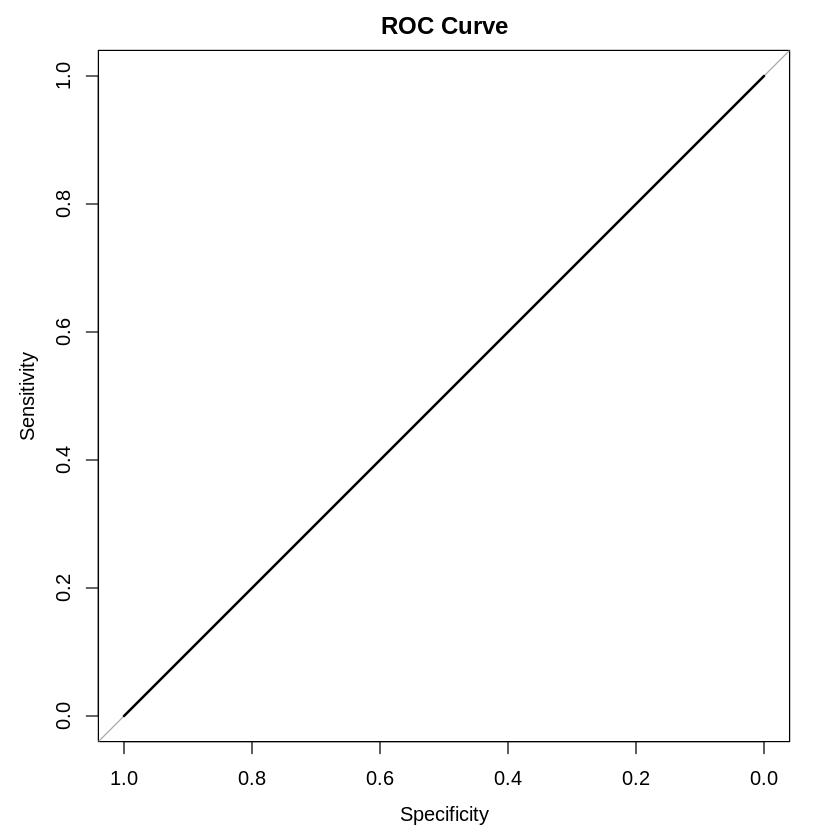

In [82]:
# Make predictions on the test set
predictions <- predict(rf_model, test_data)

# Confusion matrix
confusionMatrix(predictions, test_data$stroke)

# ROC curve and AUC
roc_curve <- roc(test_data$stroke, as.numeric(predictions))
plot(roc_curve, main = "ROC Curve")
auc(roc_curve)

In [83]:
# Compute confusion matrix
conf_matrix <- confusionMatrix(predictions, test_data$stroke)

# Print the confusion matrix
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 972  49
         1   0   0
                                         
               Accuracy : 0.952          
                 95% CI : (0.937, 0.9643)
    No Information Rate : 0.952          
    P-Value [Acc > NIR] : 0.5379         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : 7.025e-12      
                                         
            Sensitivity : 1.000          
            Specificity : 0.000          
         Pos Pred Value : 0.952          
         Neg Pred Value :   NaN          
             Prevalence : 0.952          
         Detection Rate : 0.952          
   Detection Prevalence : 1.000          
      Balanced Accuracy : 0.500          
                                         
       'Positive' Class : 0              
                                         


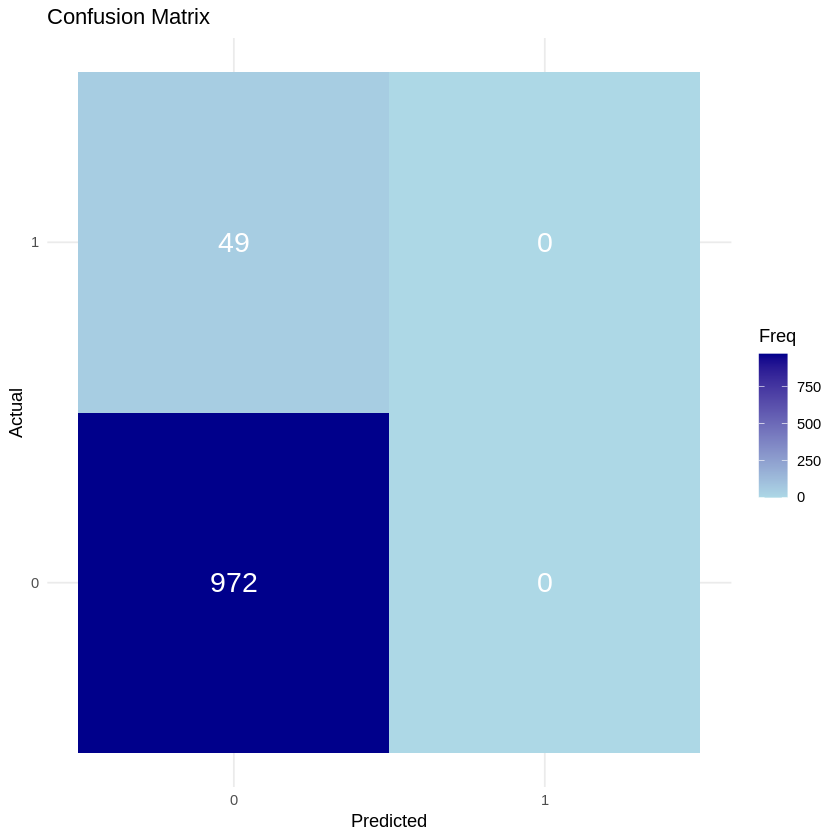

In [84]:
# Extract the confusion matrix table
conf_matrix_table <- as.data.frame(conf_matrix$table)

# Rename columns for clarity
colnames(conf_matrix_table) <- c("Predicted", "Actual", "Freq")

# Plot the confusion matrix
ggplot(data = conf_matrix_table, aes(x = Predicted, y = Actual, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), color = "white", size = 6) +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Confusion Matrix", x = "Predicted", y = "Actual") +
  theme_minimal()

In [85]:
# Train the logistic regression model
logistic_model <- glm(stroke ~ ., data = train_data, family = binomial)

# Summarize the model
summary(logistic_model)


Call:
glm(formula = stroke ~ ., family = binomial, data = train_data)

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -6.469e+00  8.233e-01  -7.858 3.91e-15 ***
id                         -1.990e-06  3.578e-06  -0.556  0.57816    
genderMale                  4.326e-02  1.576e-01   0.274  0.78372    
genderOther                -1.211e+01  6.523e+03  -0.002  0.99852    
age                         7.492e-02  1.723e-02   4.350 1.36e-05 ***
hypertension1               2.644e-01  1.886e-01   1.402  0.16095    
heart_disease1              2.851e-01  2.142e-01   1.331  0.18307    
ever_marriedYes            -3.415e-01  2.574e-01  -1.327  0.18463    
work_typeGovt_job          -1.358e+01  4.796e+02  -0.028  0.97741    
work_typeNever_worked      -2.237e+01  1.369e+03  -0.016  0.98697    
work_typePrivate           -1.337e+01  4.796e+02  -0.028  0.97777    
work_typeSelf-employed     -1.381e+01  4.796e+02  -0.029  0.97703    
Resi

In [86]:
# Predict probabilities on the test set
predicted_probs <- predict(logistic_model, test_data, type = "response")

# Convert probabilities to binary predictions (0 or 1)
predicted_classes <- ifelse(predicted_probs > 0.5, 1, 0)
predicted_classes <- as.factor(predicted_classes)

In [87]:
# Compute confusion matrix
conf_matrix <- confusionMatrix(predicted_classes, test_data$stroke)

# Print the confusion matrix
print(conf_matrix)

Warning message in confusionMatrix.default(predicted_classes, test_data$stroke):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 972  49
         1   0   0
                                         
               Accuracy : 0.952          
                 95% CI : (0.937, 0.9643)
    No Information Rate : 0.952          
    P-Value [Acc > NIR] : 0.5379         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : 7.025e-12      
                                         
            Sensitivity : 1.000          
            Specificity : 0.000          
         Pos Pred Value : 0.952          
         Neg Pred Value :   NaN          
             Prevalence : 0.952          
         Detection Rate : 0.952          
   Detection Prevalence : 1.000          
      Balanced Accuracy : 0.500          
                                         
       'Positive' Class : 0              
                                         


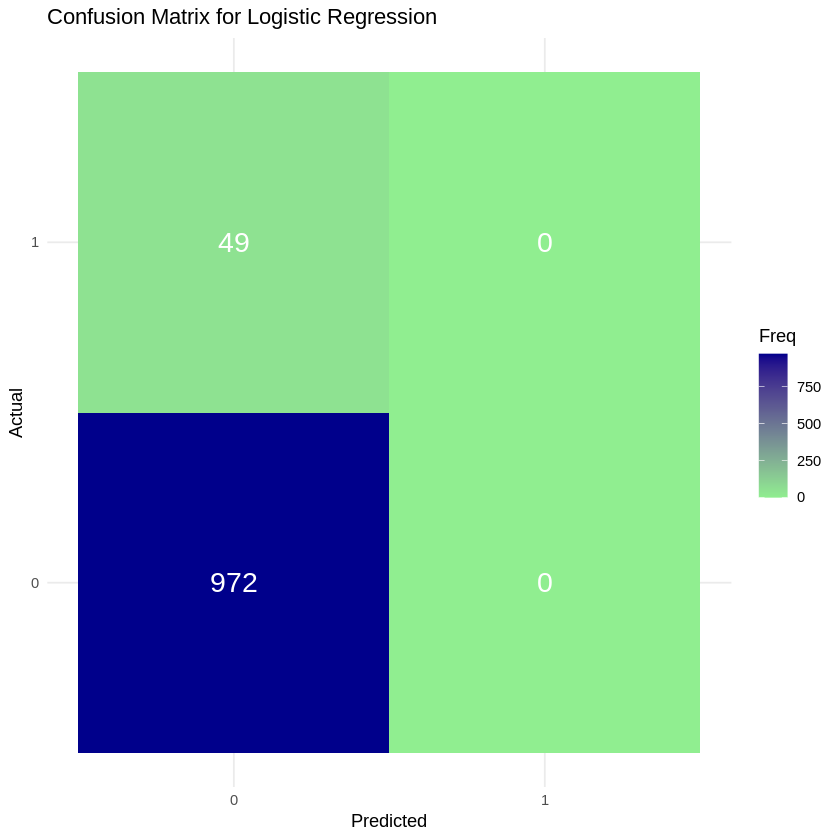

In [91]:
# Extract the confusion matrix table
conf_matrix_table <- as.data.frame(conf_matrix$table)

# Rename columns for clarity
colnames(conf_matrix_table) <- c("Predicted", "Actual", "Freq")

# Plot the confusion matrix
ggplot(data = conf_matrix_table, aes(x = Predicted, y = Actual, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), color = "white", size = 6) +
  scale_fill_gradient(low = "lightgreen", high = "darkblue") +
  labs(title = "Confusion Matrix for Logistic Regression", x = "Predicted", y = "Actual") +
  theme_minimal()

In [93]:
install.packages("xgboost")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [94]:
library(xgboost)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [95]:
# Convert categorical variables to numeric using one-hot encoding
stroke_data_encoded <- model.matrix(~ . - 1, data = stroke_data)

# Separate features and target variable
X <- stroke_data_encoded[, -which(colnames(stroke_data_encoded) == "stroke1")]
y <- stroke_data_encoded[, "stroke1"]

# Split the data into training and testing sets
set.seed(123)
trainIndex <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[trainIndex, ]
X_test <- X[-trainIndex, ]
y_train <- y[trainIndex]
y_test <- y[-trainIndex]

In [96]:
# Convert data to DMatrix (XGBoost's internal data structure)
dtrain <- xgb.DMatrix(data = X_train, label = y_train)
dtest <- xgb.DMatrix(data = X_test, label = y_test)

# Set parameters for XGBoost
params <- list(
  objective = "binary:logistic", # Binary classification
  eval_metric = "logloss",       # Logarithmic loss
  max_depth = 6,                 # Maximum depth of a tree
  eta = 0.1,                     # Learning rate
  subsample = 0.8,               # Subsample ratio
  colsample_bytree = 0.8         # Column subsample ratio
)

# Train the XGBoost model
xgb_model <- xgb.train(
  params = params,
  data = dtrain,
  nrounds = 100,                 # Number of boosting rounds
  watchlist = list(train = dtrain, test = dtest),
  early_stopping_rounds = 10,    # Stop if no improvement for 10 rounds
  verbose = 1                    # Print progress
)

[1]	train-logloss:0.613132	test-logloss:0.616193 
Multiple eval metrics are present. Will use test_logloss for early stopping.
Will train until test_logloss hasn't improved in 10 rounds.

[2]	train-logloss:0.547291	test-logloss:0.552443 
[3]	train-logloss:0.492354	test-logloss:0.500124 
[4]	train-logloss:0.445626	test-logloss:0.455430 
[5]	train-logloss:0.406062	test-logloss:0.417424 
[6]	train-logloss:0.372074	test-logloss:0.384886 
[7]	train-logloss:0.342674	test-logloss:0.357122 
[8]	train-logloss:0.316348	test-logloss:0.333393 
[9]	train-logloss:0.293716	test-logloss:0.313111 
[10]	train-logloss:0.274253	test-logloss:0.295066 
[11]	train-logloss:0.256481	test-logloss:0.280166 
[12]	train-logloss:0.241025	test-logloss:0.267283 
[13]	train-logloss:0.227225	test-logloss:0.255743 
[14]	train-logloss:0.215343	test-logloss:0.245186 
[15]	train-logloss:0.204051	test-logloss:0.236449 
[16]	train-logloss:0.193912	test-logloss:0.228815 
[17]	train-logloss:0.184955	test-logloss:0.222120 
[18]

In [97]:
# Predict probabilities on the test set
predicted_probs <- predict(xgb_model, dtest)

# Convert probabilities to binary predictions (0 or 1)
predicted_classes <- ifelse(predicted_probs > 0.5, 1, 0)
predicted_classes <- as.factor(predicted_classes)
y_test <- as.factor(y_test)

In [99]:
# Compute confusion matrix
xgb_conf_matrix <- confusionMatrix(predicted_classes, y_test)

# Print the confusion matrix
print(xgb_conf_matrix)

# Extract performance metrics
xgb_accuracy <- xgb_conf_matrix$overall["Accuracy"]
xgb_precision <- xgb_conf_matrix$byClass["Pos Pred Value"]
xgb_recall <- xgb_conf_matrix$byClass["Sensitivity"]
xgb_f1 <- xgb_conf_matrix$byClass["F1"]


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 964  56
         1   2   0
                                          
               Accuracy : 0.9432          
                 95% CI : (0.9273, 0.9566)
    No Information Rate : 0.9452          
    P-Value [Acc > NIR] : 0.6411          
                                          
                  Kappa : -0.0038         
                                          
 Mcnemar's Test P-Value : 3.421e-12       
                                          
            Sensitivity : 0.9979          
            Specificity : 0.0000          
         Pos Pred Value : 0.9451          
         Neg Pred Value : 0.0000          
             Prevalence : 0.9452          
         Detection Rate : 0.9432          
   Detection Prevalence : 0.9980          
      Balanced Accuracy : 0.4990          
                                          
       'Positive' Class : 0               
                              

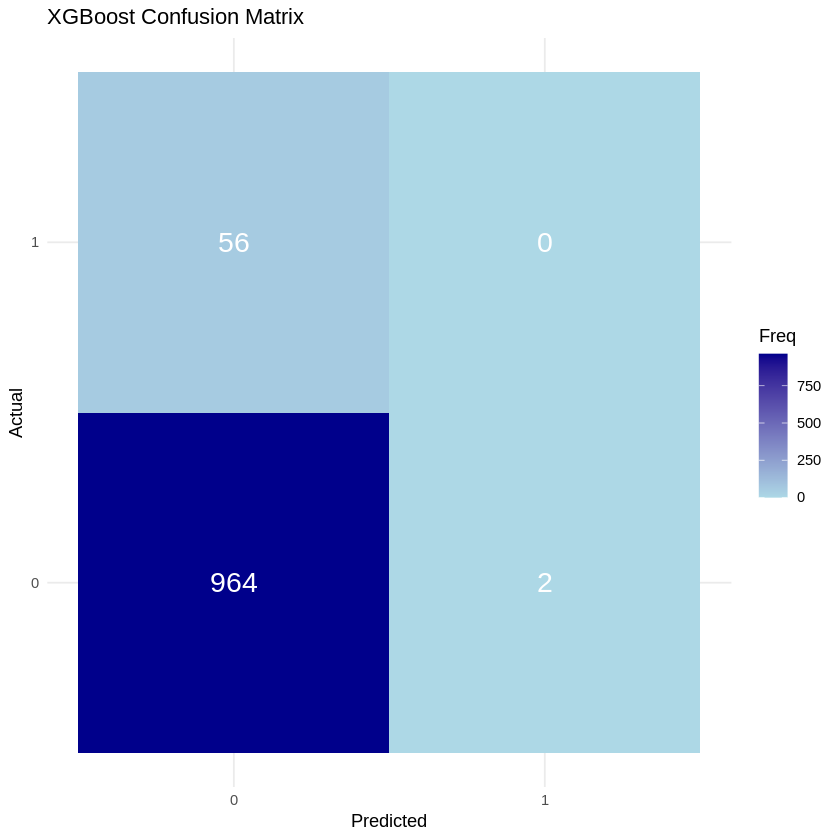

In [100]:
# Convert the confusion matrix to a data frame
xgb_conf_matrix_table <- as.data.frame(xgb_conf_matrix$table)
colnames(xgb_conf_matrix_table) <- c("Predicted", "Actual", "Freq")

# Plot the confusion matrix
p_xgb <- ggplot(data = xgb_conf_matrix_table, aes(x = Predicted, y = Actual, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), color = "white", size = 6) +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "XGBoost Confusion Matrix", x = "Predicted", y = "Actual") +
  theme_minimal()

# Display the plot
print(p_xgb)